# Pima Indian Diabetes Prediction

In [27]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dat = pd.read_excel(r'data\pima-data.xlsx',sheet_name=1)

In [3]:
dat.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
dat.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [5]:
dat.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [6]:
dat.shape

(768, 10)

In [7]:
dat.isnull().values.any()

False

In [26]:
dat_corr = dat.corr()
dat_corr

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


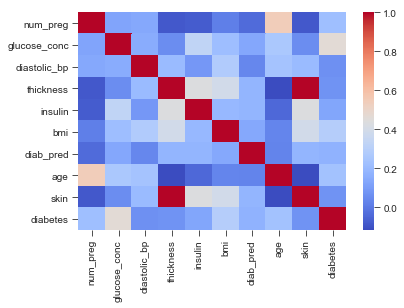

In [48]:
sns.heatmap(dat_corr, cmap='coolwarm')

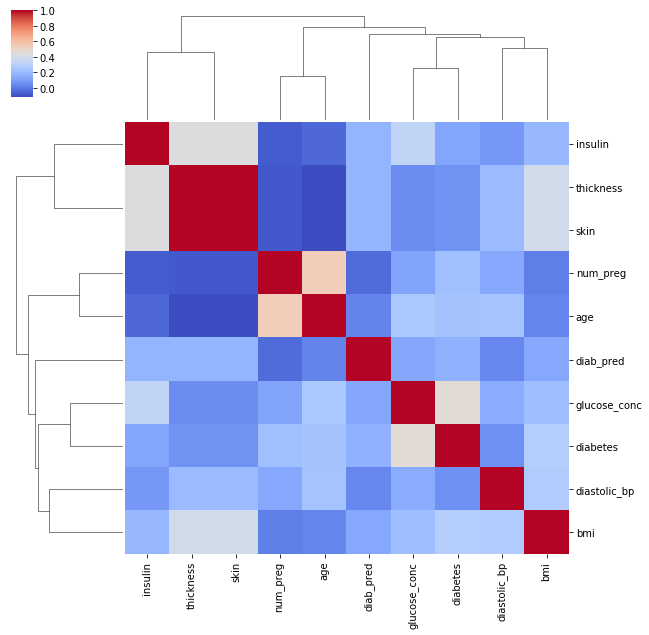

In [46]:
sns.clustermap(dat_corr, cmap='coolwarm')

In [9]:
%matplotlib inline
def plot_corr(df, size = 11):
    corr = df.corr() #Co-relation from data-frame
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

In [38]:
#plot_corr(dat)

In [11]:
dat[['thickness','skin']].corr()

,thickness,skin
thickness,1.0,1.0
skin,1.0,1.0


In [12]:
#Skin and thickness are same, Hence removing thickness 
dat2 = dat.drop(labels='skin', axis=1)

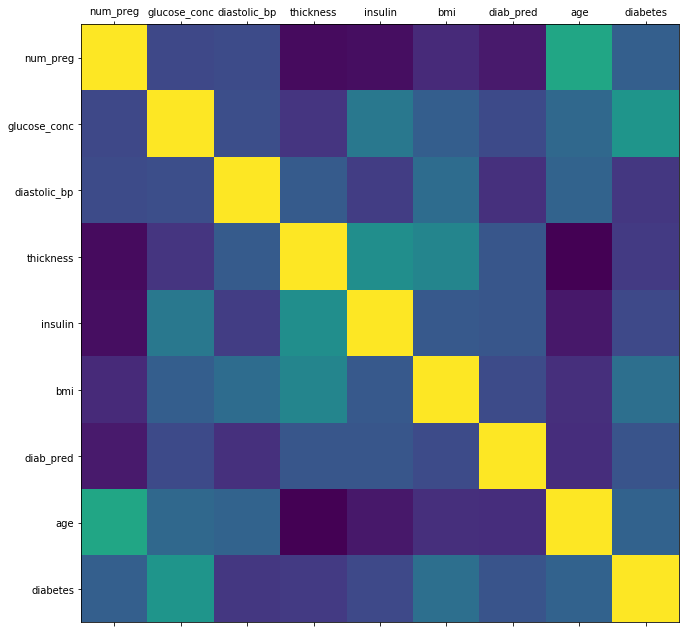

In [13]:
plot_corr(dat2)

In [14]:
dat2.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [15]:
diabetes_map = {True:1, False:0}
dat2['diabetes'] = dat2['diabetes'].map(diabetes_map)

In [16]:
dat2.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
#observation = obs
num_obs = len(dat2)
true_obs = len(dat2[dat2['diabetes'] == 1])
false_obs = len(dat2[dat2['diabetes'] == 0])

print('Number of TRUE cases:{0} ({1:1.2f}%)'.format(true_obs, true_obs*100/num_obs))
print('Number of FALSE cases:{0} ({1:1.2f}%)'.format(false_obs, false_obs*100/num_obs))

Number of TRUE cases:268 (34.90%)
Number of FALSE cases:500 (65.10%)


In [18]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_names = ['diabetes']

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
x = dat2[feature_col_names].values
y = dat2[predicted_class_names].values

split_data_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_data_size, random_state = 50)

In [20]:
print("Training set: {0:.2f}".format(len(x_train) / len(x) * 100))
print("Testing set: {0:.2f}".format(len(x_test) / len(x) * 100))

Training set: 69.92
Testing set: 30.08


In [21]:
print('Total: #of TRUE : {0} ({1:.2f}%)'.format(len(y[y == 1]), len(y[y == 1]) / len(y) * 100))
print('Total: #of FALSE: {0} ({1:.2f}%)'.format(len(y[y == 0]), len(y[y == 0]) / len(y) * 100),end='\n\n')

print('Training set: #of TRUE : {0} ({1:.2f}%)'.format(len(y_train[y_train == 1]), len(y_train[y_train == 1]) / len(y_train) * 100))
print('Training set: #of FALSE: {0} ({1:.2f}%)'.format(len(y_train[y_train == 0]), len(y_train[y_train == 0]) / len(y_train) * 100),end='\n\n')

print('Testing set: #of TRUE : {0} ({1:.2f}%)'.format(len(y_test[y_test == 1]), len(y_test[y_test == 1]) / len(y_test) * 100))
print('Testing set: #of FALSE: {0} ({1:.2f}%)'.format(len(y_test[y_test == 0]), len(y_test[y_test == 0]) / len(y_test) * 100))

Total: #of TRUE : 268 (34.90%)
Total: #of FALSE: 500 (65.10%)

Training set: #of TRUE : 185 (34.45%)
Training set: #of FALSE: 352 (65.55%)

Testing set: #of TRUE : 83 (35.93%)
Testing set: #of FALSE: 148 (64.07%)


In [22]:
#Hidden missing values
dat2.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
print('# of rows: {0}'.format(len(dat2)))

print('# of rows misssing num_preg: {0}'.format(len(dat2[dat2['num_preg'] == 0])))
print('# of rows misssing glucose_conc: {0}'.format(len(dat2[dat2['glucose_conc'] == 0])))

print('# of rows misssing diastolic_bp: {0}'.format(len(dat2[dat2['diastolic_bp'] == 0])))
print('# of rows misssing thickness: {0}'.format(len(dat2[dat2['thickness'] == 0])))

print('# of rows misssing insulin: {0}'.format(len(dat2[dat2['insulin'] == 0])))
print('# of rows misssing bmi: {0}'.format(len(dat2[dat2['bmi'] == 0])))

print('# of rows misssing diab_pred: {0}'.format(len(dat2[dat2['diab_pred'] == 0])))
print('# of rows misssing age: {0}'.format(len(dat2[dat2['age'] == 0])))

# of rows: 768
# of rows misssing num_preg: 111
# of rows misssing glucose_conc: 5
# of rows misssing diastolic_bp: 35
# of rows misssing thickness: 227
# of rows misssing insulin: 374
# of rows misssing bmi: 11
# of rows misssing diab_pred: 0
# of rows misssing age: 0


In [24]:
#Impoute with mean
from sklearn.preprocessing import Imputer

fill_0 = Imputer(missing_values=0, strategy='mean', axis=0)

x_train_fit = fill_0.fit_transform(x_train)
x_test_fit = fill_0.fit_transform(x_test)

In [25]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train_fit, y_train.ravel())

GaussianNB(priors=None)